In [1]:
#importing libraries
import numpy as np
import pandas as pd
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats
import random

## Question 1

In [2]:
#creating data generating process
def generate(beta0,beta1):
    mean = [0, 0]
    cov = [[1, 0.5], [0.5, 1]]
    x=np.random.multivariate_normal(mean, cov, 1000)
    e= np.random.normal(size=(1000,2))
    y=beta0+beta1*x+e
    return(x,y)

In [3]:
# running dgp function
x,y=generate(1,3)

In [4]:
# building linear Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lreg = LinearRegression()


In [5]:
#splitting Data
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
x, y,random_state=0)


In [6]:
# splitting data
model = lreg.fit(X_train , y_train)

In [7]:
model.coef_

array([[ 2.94174256,  0.0281521 ],
       [-0.04344355,  3.03312281]])

In [8]:
ypred=model.predict(X_test)

In [9]:
mspesk1 = mean_squared_error(y_test,ypred)
mspesk1

1.0687492878490787

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
a=abs(scores.mean())

In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
u=abs(scores.mean())

In [12]:
# Changing value of beta0 and beta1 for dgp

In [13]:
x,y=generate(0.1,1)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lreg = LinearRegression()


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
x, y,random_state=0)

In [16]:
# splitting data
model = lreg.fit(X_train , y_train)

In [17]:
model.coef_

array([[0.97319461, 0.04281994],
       [0.0640154 , 1.01590763]])

In [18]:
ypred=model.predict(X_test)

In [19]:
mspesk2 = mean_squared_error(y_test,ypred)
mspesk2

1.1090274597355683

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
m=abs(scores.mean())

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
n=abs(scores.mean())

In [22]:
df={'Beta0':[1,1,0.1,0.1],'beta1':[3,3,1,1],'mspe_actual':[mspesk1,mspesk1,mspesk2,mspesk2],'CV':[5,10,5,10],'mspe_CV':[a,u,m,n],'difference':[(a-mspesk1),(u-mspesk1),(m-mspesk2),(n-mspesk2)]}
df1=pd.DataFrame(data=df)


In [23]:
print(df1)

   Beta0  beta1  mspe_actual  CV   mspe_CV  difference
0    1.0      3     1.068749   5  1.084933    0.016184
1    1.0      3     1.068749  10  1.081814    0.013064
2    0.1      1     1.109027   5  1.143365    0.034337
3    0.1      1     1.109027  10  1.133760    0.024732


## From the above dataframe, we can see the difference between actual mspe and cross validation.

## Question 2

In [24]:
#creating data generating process
def generate(beta0,beta1):
    mean = [0, 0]
    cov = [[1, 0.5], [0.5, 1]]
    x=np.random.multivariate_normal(mean, cov, 1000)
    e= np.random.normal(size=(1000,2))
    y=beta0+beta1*x+e
    return(x,y)

In [25]:
x,y=generate(1,3)

In [26]:
model = smf.OLS(y, x)
model = model.fit()

In [27]:
r=model.params
r

array([[3.01013897, 0.02910655],
       [0.00492737, 3.07553383]])

In [28]:
## Creating Bootstrap
from sklearn.utils import resample
boot = resample(r, replace=True, n_samples=1000, random_state=1)

In [29]:
# T-Test Comparision 
stats.ttest_ind(r,boot)

Ttest_indResult(statistic=array([-0.06216128,  0.06216128]), pvalue=array([0.95044682, 0.95044682]))

In [30]:
# Changing value of beta0 and beta1 for dgp
#creating data generating process
def generate(beta0,beta1):
    mean = [0, 0]
    cov = [[1, 0.5], [0.5, 1]]
    x=np.random.multivariate_normal(mean, cov, 1000)
    e= np.random.normal(size=(1000,2))
    y=beta0+beta1*x+e
    return(x,y)

In [31]:
x,y=generate(0.1,1)

In [32]:
x= sm.add_constant(x)
model = smf.OLS(y, x)
model = model.fit()

In [33]:
r=model.params
r

array([[ 0.07983989,  0.1387926 ],
       [ 1.02802391,  0.03248262],
       [-0.02948371,  0.9778668 ]])

In [34]:
##Creating Bootstrap
from sklearn.utils import resample
boot = resample(r, replace=True, n_samples=1000, random_state=1)

In [35]:
# T-Test Comparision 
stats.ttest_ind(r,boot)

Ttest_indResult(statistic=array([ 0.01645756, -0.0144218 ]), pvalue=array([0.98687264, 0.98849634]))

In [36]:
df={'Beta0':[1,0.1],'beta1':[3,1],'No_of_Simulation':[1000,1000],'t-stat':[0.0621,0.01646],'Critical_value':[1.96,1.96],'p-value':[0.95,0.988]}
df1=pd.DataFrame(data=df)


In [37]:
print(df1)

   Beta0  beta1  No_of_Simulation   t-stat  Critical_value  p-value
0    1.0      3              1000  0.06210            1.96    0.950
1    0.1      1              1000  0.01646            1.96    0.988


## From the above results, we observe that if we increase the value of beta, then the p- value decreases

## Question 3

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [39]:
import pandas as pd
sp500= pd.read_csv('SP500 (3).csv')
gold= pd.read_csv('GOLDAMGBD228NLBM (1).csv')
dcoil= pd.read_csv('DCOILWTICO (1).csv')
bt= pd.read_csv('BTC-USD (2).csv')
dex= pd.read_csv('DEXUSEU (1).csv')

In [40]:
from IPython.display import display
display(bt.head())
display(sp500.head())
display(gold.head())
display(dex.head())
display(dcoil.head())

,DATE,BTC
0,2013-12-31,805.940002
1,2014-01-01,815.940002
2,2014-01-02,856.909973
3,2014-01-03,884.260010
4,2014-01-04,924.690002


,DATE,SP500
0,2013-12-31,1848.36
1,2014-01-01,.
2,2014-01-02,1831.98
3,2014-01-03,1831.37
4,2014-01-06,1826.77


,DATE,GOLDAMGBD228NLBM
0,2014-03-26,1314.500
1,2014-03-27,1295.000
2,2014-03-28,1295.750
3,2014-03-31,1294.000
4,2014-04-01,1286.50


,DATE,DEXUSEU
0,2013-12-31,1.3779
1,2014-01-01,.
2,2014-01-02,1.3670
3,2014-01-03,1.3606
4,2014-01-06,1.3636


,DATE,DCOILWTICO
0,2013-12-31,98.17
1,2014-01-01,.
2,2014-01-02,95.14
3,2014-01-03,93.66
4,2014-01-06,93.12


In [41]:
from IPython.display import display
display(bt.shape)
display(sp500.shape)
display(gold.shape)
display(dex.shape)
display(dcoil.shape)

(1827, 2)

(1305, 2)

(1305, 2)

(1305, 2)

(1305, 2)

## 3.Merging

In [42]:
df=pd.merge(sp500,gold)
df=pd.merge(df,dcoil)
df=pd.merge(df,dex)
df=pd.merge(df,bt)

In [43]:
df.head()

,DATE,SP500,GOLDAMGBD228NLBM,DCOILWTICO,DEXUSEU,BTC
0,2014-03-26,1852.56,1314.500,100.61,1.3786,562.450012
1,2014-03-27,1849.04,1295.000,101.25,1.3752,460.450012
2,2014-03-28,1857.62,1295.750,101.73,1.3753,482.609985
3,2014-03-31,1872.34,1294.000,101.57,1.3777,463.450012
4,2014-04-01,1885.52,1286.50,99.69,1.3804,424.369995


In [44]:
df.shape

(1244, 6)

In [45]:
df=df[df['SP500']!='.']
df=df[df['GOLDAMGBD228NLBM']!='.']
df=df[df['DCOILWTICO']!='.']
df=df[df['DEXUSEU']!='.']

In [46]:
df.head()

,DATE,SP500,GOLDAMGBD228NLBM,DCOILWTICO,DEXUSEU,BTC
0,2014-03-26,1852.56,1314.500,100.61,1.3786,562.450012
1,2014-03-27,1849.04,1295.000,101.25,1.3752,460.450012
2,2014-03-28,1857.62,1295.750,101.73,1.3753,482.609985
3,2014-03-31,1872.34,1294.000,101.57,1.3777,463.450012
4,2014-04-01,1885.52,1286.50,99.69,1.3804,424.369995


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 0 to 1242
Data columns (total 6 columns):
DATE                1165 non-null object
SP500               1165 non-null object
GOLDAMGBD228NLBM    1165 non-null object
DCOILWTICO          1165 non-null object
DEXUSEU             1165 non-null object
BTC                 1165 non-null float64
dtypes: float64(1), object(5)
memory usage: 63.7+ KB


In [48]:
df.shape

(1165, 6)

In [49]:
df['GOLDAMGBD228NLBM'] = df['GOLDAMGBD228NLBM'].astype(float)
df['SP500'] = df['SP500'].astype(float)
df['DCOILWTICO'] = df['DCOILWTICO'].astype(float)
df['DEXUSEU'] = df['DEXUSEU'].astype(float)
df['BTC'] = df['BTC'].astype(float)
df['DATE']=pd.to_datetime(df.DATE)
print(df.dtypes)

DATE                datetime64[ns]
SP500                      float64
GOLDAMGBD228NLBM           float64
DCOILWTICO                 float64
DEXUSEU                    float64
BTC                        float64
dtype: object


In [50]:
c=['BTC', 'DEXUSEU', 'DCOILWTICO', 'SP500', 'GOLDAMGBD228NLBM']
c

['BTC', 'DEXUSEU', 'DCOILWTICO', 'SP500', 'GOLDAMGBD228NLBM']

## 4.Plot

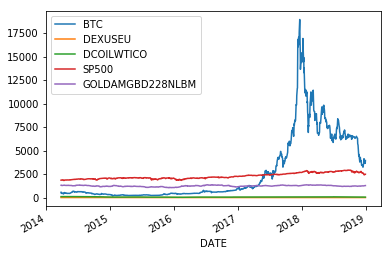

In [51]:
df[[r for r in c] + 
   ['DATE']].groupby('DATE').sum().plot()

## 5. Regression

In [52]:
import statsmodels.api as sm

In [53]:
X = np.column_stack((df['SP500'], df['GOLDAMGBD228NLBM'],df['DCOILWTICO'],df['DEXUSEU']))
X = sm.add_constant(X)
model = sm.OLS(df['BTC'],X)
results = model.fit()
print(results.params)

const   -41723.464532
x1          10.376821
x2          -1.245297
x3         -59.774503
x4       22202.942181
dtype: float64


In [54]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     1082.
Date:                Wed, 10 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:52:26   Log-Likelihood:                -10274.
No. Observations:                1165   AIC:                         2.056e+04
Df Residuals:                    1160   BIC:                         2.058e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.172e+04   1250.421    -33.368      0.0

## 6.KPSS

In [55]:
from statsmodels.tsa.api import kpss

In [56]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform  test:
    return(kpss_test(timeseries))

In [57]:
def kpss_test(times):
    kpsstest=kpss(times,regression='c')
    kpss_output=pd.Series(kpsstest[0:3],index=['Test Statistic','P-value','Lags used'])
    for key, value in kpsstest[3].items():
        kpss_output['Critical Value(%s)'%key] =value
    return kpss_output

In [58]:
kpss_test(df['BTC']) #not

C:\Users\Siddarth\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic           3.063346
P-value                  0.010000
Lags used               23.000000
Critical Value(10%)      0.347000
Critical Value(5%)       0.463000
Critical Value(2.5%)     0.574000
Critical Value(1%)       0.739000
dtype: float64

In [59]:
kpss_test(df['DEXUSEU']) #not

C:\Users\Siddarth\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic           1.141792
P-value                  0.010000
Lags used               23.000000
Critical Value(10%)      0.347000
Critical Value(5%)       0.463000
Critical Value(2.5%)     0.574000
Critical Value(1%)       0.739000
dtype: float64

In [60]:
kpss_test(df['SP500']) #not

C:\Users\Siddarth\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic           4.395969
P-value                  0.010000
Lags used               23.000000
Critical Value(10%)      0.347000
Critical Value(5%)       0.463000
Critical Value(2.5%)     0.574000
Critical Value(1%)       0.739000
dtype: float64

In [61]:
kpss_test(df['GOLDAMGBD228NLBM']) #not 2.5%

C:\Users\Siddarth\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic           0.786909
P-value                  0.010000
Lags used               23.000000
Critical Value(10%)      0.347000
Critical Value(5%)       0.463000
Critical Value(2.5%)     0.574000
Critical Value(1%)       0.739000
dtype: float64

In [62]:
kpss_test(df['DCOILWTICO']) #not

C:\Users\Siddarth\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic           1.152118
P-value                  0.010000
Lags used               23.000000
Critical Value(10%)      0.347000
Critical Value(5%)       0.463000
Critical Value(2.5%)     0.574000
Critical Value(1%)       0.739000
dtype: float64

In [63]:
# If the test statistic Test Statistic is greater than the critical value of 10,5,2,5,1, we reject the null hypothesis (the sequence is not stationary).
#If the test statistic is less than the critical value, the null hypothesis cannot be rejected (the sequence is stationary).
# For the  data, the value of the test statistic is greater than the critical value in all confidence intervals, so it can be said that the sequence is not stable

## 7.Differenced series

In [64]:
# create a differenced series
def difference(dataset, interval):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [65]:
df.head()

,DATE,SP500,GOLDAMGBD228NLBM,DCOILWTICO,DEXUSEU,BTC
0,2014-03-26,1852.56,1314.50,100.61,1.3786,562.450012
1,2014-03-27,1849.04,1295.00,101.25,1.3752,460.450012
2,2014-03-28,1857.62,1295.75,101.73,1.3753,482.609985
3,2014-03-31,1872.34,1294.00,101.57,1.3777,463.450012
4,2014-04-01,1885.52,1286.50,99.69,1.3804,424.369995


In [66]:
df1=df

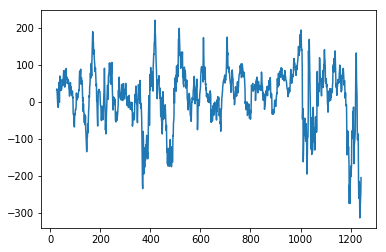

In [67]:
diffsp500=df1['SP500'].diff(23)
plt.plot(diffsp500)
plt.show()

[]

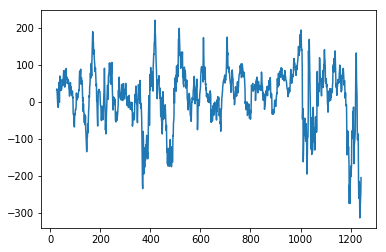

In [68]:
df1['SP500'] = df1['SP500'] - df1['SP500'].shift(23)
df1['SP500'].dropna().plot()
plt.plot()

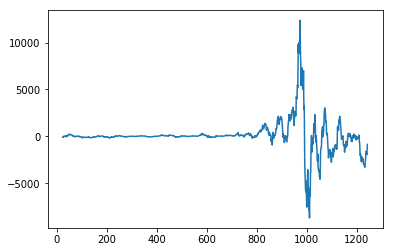

In [69]:
diffbtc=df1['BTC'].diff(23)
plt.plot(diffbtc)
plt.show()

[]

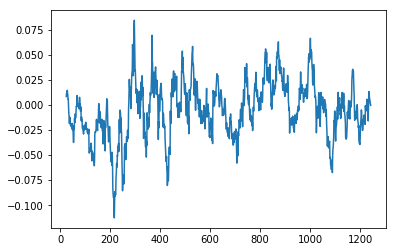

In [70]:
df1['DEXUSEU'] = df1['DEXUSEU'] - df1['DEXUSEU'].shift(23)
df1['DEXUSEU'].dropna().plot()
plt.plot()

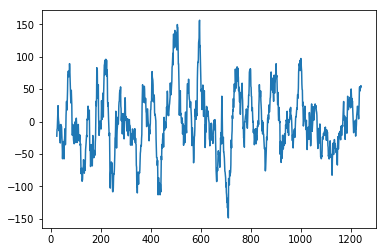

In [71]:
diffGOLDAMGBD228NLBM=df1['GOLDAMGBD228NLBM'].diff(23)
plt.plot(diffGOLDAMGBD228NLBM)
plt.show()

[]

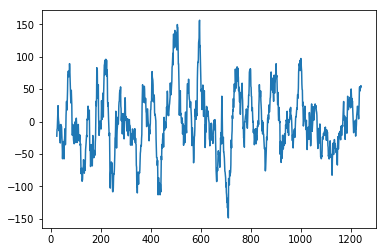

In [72]:
df1['GOLDAMGBD228NLBM'] = df1['GOLDAMGBD228NLBM'] - df1['GOLDAMGBD228NLBM'].shift(23)
df1['GOLDAMGBD228NLBM'].dropna().plot()
plt.plot()

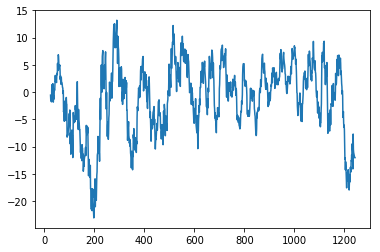

In [73]:
diffDCOILWTICO=df1['DCOILWTICO'].diff(23)
plt.plot(diffDCOILWTICO)
plt.show()

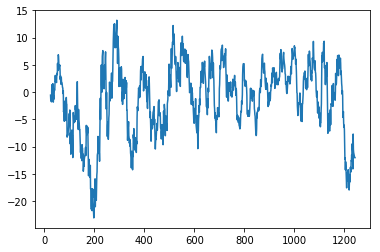

In [74]:
df['DCOILWTICO'] = df1['DCOILWTICO'] - df1['DCOILWTICO'].shift(23)
df['DCOILWTICO'].dropna().plot()

In [75]:
df1.head()

,DATE,SP500,GOLDAMGBD228NLBM,DCOILWTICO,DEXUSEU,BTC
0,2014-03-26,NaN,NaN,NaN,NaN,562.450012
1,2014-03-27,NaN,NaN,NaN,NaN,460.450012
2,2014-03-28,NaN,NaN,NaN,NaN,482.609985
3,2014-03-31,NaN,NaN,NaN,NaN,463.450012
4,2014-04-01,NaN,NaN,NaN,NaN,424.369995


In [76]:
df2=df1.dropna() 
df2.head()

,DATE,SP500,GOLDAMGBD228NLBM,DCOILWTICO,DEXUSEU,BTC
25,2014-04-30,31.39,-22.50,-0.54,0.0084,460.130005
26,2014-05-01,34.64,-12.00,-1.56,0.0115,453.670013
27,2014-05-02,23.52,-10.75,-1.64,0.0111,438.649994
29,2014-05-06,-4.62,14.50,-1.76,0.0147,446.549988
30,2014-05-07,-7.31,24.50,1.37,0.0113,441.109985


In [77]:
X2 = np.column_stack((df2['SP500'], df2['GOLDAMGBD228NLBM'],df2['DCOILWTICO'],df2['DEXUSEU']))
X2 = sm.add_constant(X2)
model = sm.OLS(df2['BTC'],X2)
results = model.fit()
print(results.params)


const     2840.586314
x1           1.177124
x2          -2.982370
x3          89.912025
x4       14983.426161
dtype: float64


In [78]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BTC   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     15.29
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           3.50e-12
Time:                        22:52:27   Log-Likelihood:                -10935.
No. Observations:                1142   AIC:                         2.188e+04
Df Residuals:                    1137   BIC:                         2.191e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2840.5863    109.060     26.046      0.0

## 8.Removing dates before 2017

In [79]:
import datetime

df_before = datetime.date(2016, 12, 31)
bdate = df[df['DATE'] > pd.to_datetime(df_before)]

In [80]:
bdate.head()

,DATE,SP500,GOLDAMGBD228NLBM,DCOILWTICO,DEXUSEU,BTC
724,2017-01-03,56.11,-40.45,6.70,-0.0160,1033.300049
725,2017-01-04,66.09,-21.40,7.97,-0.0150,1135.410034
726,2017-01-05,70.19,-14.35,4.36,0.0020,989.349976
727,2017-01-06,85.90,9.25,2.90,-0.0074,886.159973
728,2017-01-09,76.95,4.45,0.25,-0.0090,899.780029


## 9.ACF and PACF

C:\Users\Siddarth\Anaconda3\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


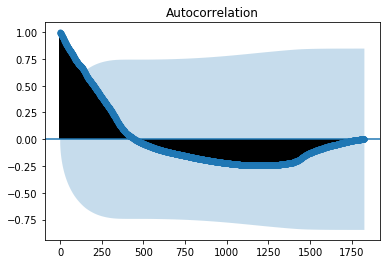

In [81]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = Series.from_csv('BTC-USD (2).csv', header=0)
plot_acf(series)
pyplot.show()

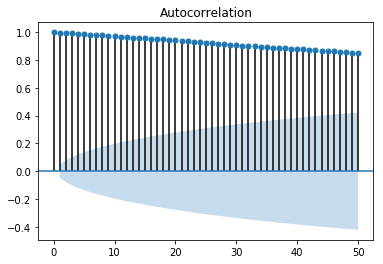

In [82]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series1 = bdate.iloc[:,1]
plot_acf(series, lags=50)
pyplot.show()

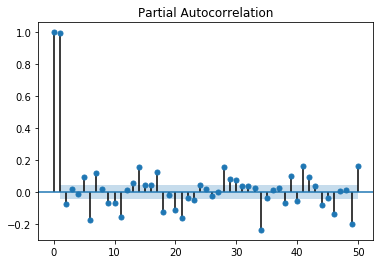

In [83]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
series1 = bdate.iloc[:,1]
plot_pacf(series, lags=50)
pyplot.show()

C:\Users\Siddarth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


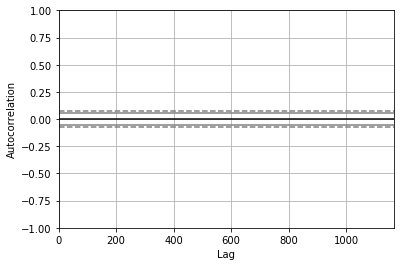

In [84]:
series2 = df.iloc[:,2]
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series2)
pyplot.show()

C:\Users\Siddarth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


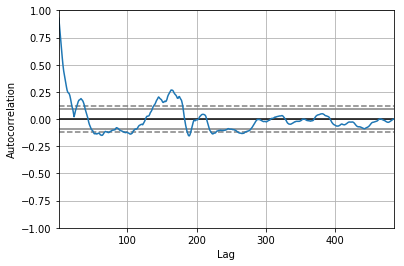

In [85]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series1)
pyplot.show()

## 10.ARIMA

In [86]:
import pandas
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

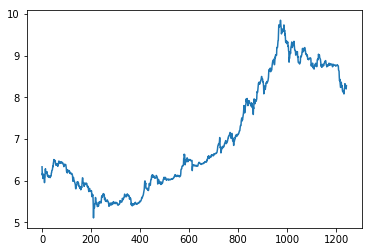

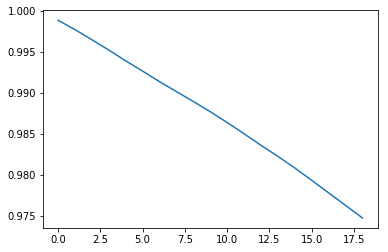

C:\Users\Siddarth\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


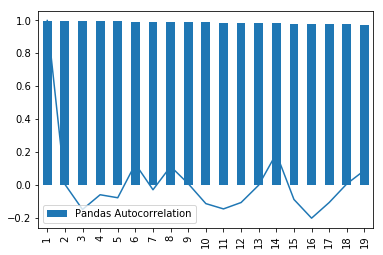

(-0.32224064805965275,
 0.922294791573623,
 0,
 1164,
 {'1%': -3.4359803948357723,
  '5%': -2.8640262259528595,
  '10%': -2.5680937227063922},
 -3821.661691346326)

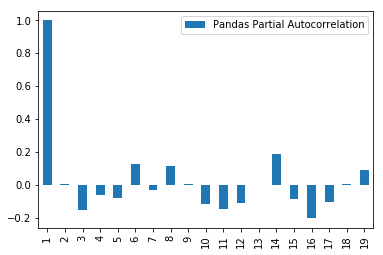

In [87]:
lnprice=np.log(df['BTC'])
lnprice
plt.plot(lnprice)
plt.show()
acf_1 =  acf(lnprice)[1:20]
plt.plot(acf_1)
plt.show()
test_df = pandas.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 =  pacf(lnprice)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pandas.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
result = ts.adfuller(lnprice, 1)
result

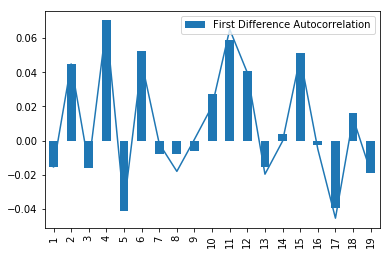

In [88]:
lnprice_diff=lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
acf_1_diff =  acf(diff)[1:20]
test_df = pandas.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1_diff =  pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

In [89]:
price_matrix=lnprice.as_matrix()
model = ARIMA(price_matrix, order=(3,1,0))
model_fit = model.fit(disp=0)


C:\Users\Siddarth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [90]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1164
Model:                 ARIMA(3, 1, 0)   Log Likelihood                1907.104
Method:                       css-mle   S.D. of innovations              0.047
Date:                Wed, 10 Apr 2019   AIC                          -3804.207
Time:                        22:52:29   BIC                          -3778.909
Sample:                             1   HQIC                         -3794.664
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.001      1.195      0.232      -0.001       0.004
ar.L1.D.y     -0.0146      0.030     -0.494      0.622      -0.073       0.043
ar.L2.D.y      0.0457      0.030      1.546      0.1

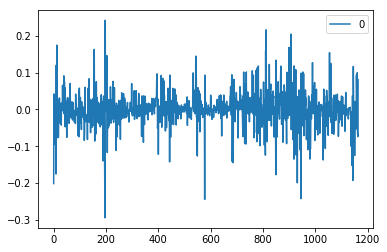

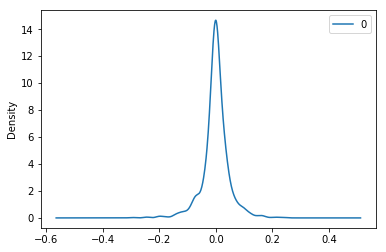

                  0
count  1.164000e+03
mean   8.717892e-07
std    4.703351e-02
min   -2.951909e-01
25%   -1.532061e-02
50%    3.353931e-04
75%    1.939908e-02
max    2.426331e-01


In [91]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predict=1204.070555, expect=1215.199951
predict=1214.200419, expect=1238.089966
predict=1238.080284, expect=1249.640015
predict=1246.876166, expect=1240.890015
predict=1239.403063, expect=1249.140015
predict=1251.506501, expect=1248.180054
predict=1247.034424, expect=1264.310059
predict=1265.658024, expect=1286.630005
predict=1285.284059, expect=1332.910034
predict=1331.915355, expect=1329.619995
predict=1322.737639, expect=1336.280029
predict=1338.361202, expect=1351.910034
predict=1351.902591, expect=1415.810059
predict=1416.661033, expect=1445.930054
predict=1437.771935, expect=1485.550049
predict=1484.485009, expect=1516.760010
predict=1513.346284, expect=1507.770020
predict=1503.901821, expect=1545.290039
predict=1549.919828, expect=1554.449951
predict=1549.466451, expect=1664.469971
predict=1670.149727, expect=1697.500000
predict=1683.657778, expect=1752.310059
predict=1754.314239, expect=1819.290039
predict=1817.760464, expect=1686.390015
predict=1672.117801, expect=1763.739990


predict=6595.814232, expect=6339.859863
predict=6314.805685, expect=5878.129883
predict=5803.114997, expect=6522.450195
predict=6510.423055, expect=6597.060059
predict=6596.241854, expect=7283.220215
predict=7289.509202, expect=7853.680176
predict=7944.517034, expect=7699.950195
predict=7747.009740, expect=7780.910156
predict=7796.300906, expect=8042.640137
predict=8055.374703, expect=8244.690430
predict=8276.412844, expect=8099.970215
predict=8118.293048, expect=8234.549805
predict=8246.448239, expect=8013.410156
predict=8010.934471, expect=8200.799805
predict=8203.576864, expect=8754.690430
predict=8783.406555, expect=9318.419922
predict=9403.220740, expect=9733.200195
predict=9837.865106, expect=9906.040039
predict=9980.561876, expect=9837.860352
predict=9860.201991, expect=9946.759766
predict=9963.238295, expect=10861.469730
predict=10968.904584, expect=10912.730470
predict=10985.383067, expect=11246.209960
predict=11335.357920, expect=11623.910160
predict=11701.726436, expect=1166

C:\Users\Siddarth\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predict=19634.175968, expect=19065.710940
predict=18454.735849, expect=18972.320310
predict=19258.329112, expect=17523.699220
predict=17099.614118, expect=16461.970700
predict=16548.160764, expect=15632.120120
predict=15591.625527, expect=13664.969730
predict=12953.851323, expect=14396.459960
predict=15098.210218, expect=13789.950200
predict=13371.936588, expect=13833.490230
predict=13972.792160, expect=15756.559570
predict=16291.545496, expect=15416.639650
predict=14968.103083, expect=14398.700200
predict=14365.555923, expect=14392.570310
predict=14593.855465, expect=12531.519530
predict=11951.830204, expect=13850.400390
predict=14377.719998, expect=13444.879880
predict=13203.772387, expect=14754.129880
predict=14904.073324, expect=15156.620120
predict=15158.938315, expect=15180.080080
predict=15123.924339, expect=16954.779300
predict=17215.763439, expect=17172.300780
predict=17122.739649, expect=16228.160160
predict=16108.114247, expect=14976.169920
predict=14860.578001, expect=14468

predict=6611.309938, expect=6758.080078
predict=6769.755947, expect=6707.379883
predict=6704.787912, expect=6668.839844
predict=6671.819830, expect=6306.850098
predict=6287.282450, expect=6394.359863
predict=6410.283948, expect=6253.600098
predict=6243.868910, expect=6229.830078
predict=6234.753028, expect=6268.750000
predict=6273.966573, expect=6364.259766
predict=6372.601685, expect=6740.549805
predict=6766.334616, expect=7326.700195
predict=7362.362604, expect=7383.390137
predict=7381.876205, expect=7477.500000
predict=7490.222299, expect=7333.930176
predict=7326.729952, expect=7405.399902
predict=7417.071264, expect=7398.640137
predict=7399.816298, expect=7718.000000
predict=7743.406318, expect=8395.820313
predict=8440.063164, expect=8170.229980
predict=8148.162081, expect=7937.250000
predict=7933.907104, expect=8182.890137
predict=8206.781556, expect=8230.870117
predict=8231.430036, expect=8216.780273
predict=8220.671925, expect=8176.060059
predict=8178.169858, expect=7735.299805


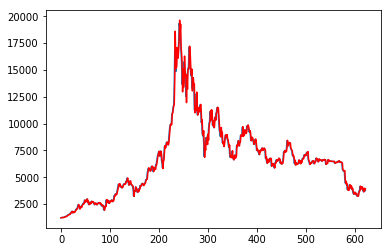

In [92]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predict=%f, expect=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [93]:
X = df.values

In [94]:
series

DATE
2013-12-31     805.940002
2014-01-01     815.940002
2014-01-02     856.909973
2014-01-03     884.260010
2014-01-04     924.690002
2014-01-05    1014.739990
2014-01-06    1012.650024
2014-01-07     879.900024
2014-01-08     938.840027
2014-01-09     936.950012
2014-01-10     957.760010
2014-01-11    1005.320007
2014-01-12     939.789978
2014-01-13     922.909973
2014-01-14     919.280029
2014-01-15     941.219971
2014-01-16     913.489990
2014-01-17     894.159973
2014-01-18     905.719971
2014-01-19     954.799988
2014-01-20     955.950012
2014-01-21     962.210022
2014-01-22     950.950012
2014-01-23     944.159973
2014-01-24     916.549988
2014-01-25     961.049988
2014-01-26    1007.000000
2014-01-27     943.539978
2014-01-28     932.679993
2014-01-29     925.669983
                 ...     
2018-12-02    4143.859863
2018-12-03    3871.409912
2018-12-04    3948.439941
2018-12-05    3737.530029
2018-12-06    3485.179932
2018-12-07    3420.570068
2018-12-08    3461.070068
2018-12

In [95]:
# create a differenced series
import numpy
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1462
Model:                     ARMA(7, 1)   Log Likelihood              -10550.943
Method:                       css-mle   S.D. of innovations            328.939
Date:                Wed, 10 Apr 2019   AIC                          21121.886
Time:                        22:54:17   BIC                          21174.762
Sample:                             0   HQIC                         21141.610
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1753.2813   4103.070      0.427      0.669   -6288.589    9795.152
ar.L1.y        1.2466      0.144      8.655      0.000       0.964       1.529
ar.L2.y       -0.3062      0.164     -1.865      0.0

In [96]:
# create a differenced series
import numpy
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(5,2,2))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                 1460
Model:                 ARIMA(5, 2, 2)   Log Likelihood              -10539.639
Method:                       css-mle   S.D. of innovations            329.491
Date:                Wed, 10 Apr 2019   AIC                          21097.278
Time:                        22:54:19   BIC                          21144.854
Sample:                             2   HQIC                         21115.026
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0395      0.024     -1.622      0.105      -0.087       0.008
ar.L1.D2.y    -0.1438      0.095     -1.510      0.131      -0.330       0.043
ar.L2.D2.y    -0.0123      0.029     -0.431      0.6

## 11. Forcecast

In [97]:
forecast = model_fit.predict()

In [98]:
forecast

array([-3.95189432e-02,  1.15370338e+01,  1.70732030e+01, ...,
       -9.96605200e+02,  7.41066453e+01, -2.04141811e+03])

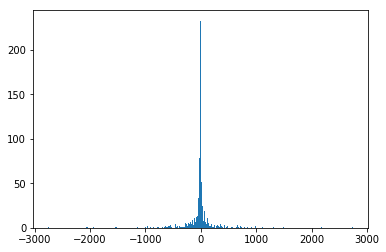

In [99]:
# Plot histogram
np.histogram(forecast, bins=30, density=True)
plt.hist(forecast, bins='auto') 
plt.show()

In [100]:
predictions=model_fit.predict(1245, 1275, typ='levels')
predictions

array([4859.48016392, 5242.28490943, 5140.08895749, 5253.21656243,
       4990.19711937, 5212.10036078, 5139.38531187, 4946.8965984 ,
       4891.23224428, 4765.47568037, 5041.57776826, 4744.17286954,
       4689.73253502, 3711.01767515, 3999.10983903, 3832.117814  ,
       3593.25299768, 4096.04151173, 3925.04296931, 4006.92844264,
       3660.11570429, 4351.7010225 , 4003.48250806, 4022.57718246,
       3963.89804844, 3297.67186783, 3466.64706469, 3532.97797962,
       3780.5094388 , 3465.36279019, 3585.15708968])

In [101]:
df.tail()

,DATE,SP500,GOLDAMGBD228NLBM,DCOILWTICO,DEXUSEU,BTC
1235,2018-12-19,-215.22,51.05,-7.67,0.0134,3736.540039
1236,2018-12-20,-234.16,53.55,-10.52,0.0120,4137.660156
1237,2018-12-21,-313.58,47.00,-11.07,0.0078,3898.810059
1241,2018-12-27,-247.44,55.30,-12.01,0.0010,3646.090088
1242,2018-12-28,-204.99,53.70,-12.01,-0.0003,3947.860107


In [102]:
price_matrix

array([6.33230226, 6.1322043 , 6.17920884, ..., 8.26842667, 8.20141066,
       8.28092897])

In [103]:
lnprice

0       6.332302
1       6.132204
2       6.179209
3       6.138699
4       6.050606
5       6.078353
6       6.096635
7       6.123873
8       6.145387
9       6.125427
10      5.952282
11      6.075668
12      6.081419
13      6.266118
14      6.285905
15      6.218600
16      6.185220
19      6.188880
20      6.215188
21      6.140940
22      6.126585
23      6.100588
24      6.099489
25      6.131509
26      6.117370
27      6.083702
29      6.101551
30      6.089294
31      6.099085
32      6.113461
          ...   
1206    8.771224
1207    8.760608
1209    8.754503
1210    8.655471
1211    8.638968
1212    8.628067
1213    8.478373
1214    8.398817
1215    8.432297
1218    8.238693
1219    8.248788
1220    8.357857
1221    8.363270
1222    8.296464
1223    8.261374
1224    8.281076
1226    8.156275
1227    8.137563
1228    8.151091
1229    8.131831
1230    8.156393
1231    8.103225
1232    8.081933
1233    8.174193
1234    8.220363
1235    8.225915
1236    8.327886
1237    8.2684

## 12.Periodogram

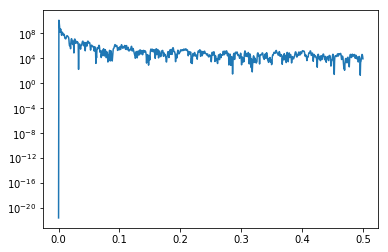

In [104]:
import scipy
f, Pxx_den=scipy.signal.periodogram(series, fs=1.0, window=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1)
plt.semilogy(f, Pxx_den)
plt.show()

In [105]:
newbitcoin = df[488:843]
newbitcoin

,DATE,SP500,GOLDAMGBD228NLBM,DCOILWTICO,DEXUSEU,BTC
518,2016-03-21,124.78,41.85,9.23,0.0120,411.109985
519,2016-03-22,131.97,47.40,10.68,0.0136,416.209991
520,2016-03-23,118.93,10.70,8.69,0.0047,416.980011
521,2016-03-24,90.44,12.80,6.77,0.0145,414.739990
524,2016-03-29,133.74,-2.30,5.07,0.0188,412.440002
525,2016-03-30,134.15,5.95,6.56,0.0309,415.660004
526,2016-03-31,108.04,-1.80,5.54,0.0364,415.640015
527,2016-04-01,124.73,1.10,3.71,0.0453,418.510010
528,2016-04-04,133.90,-19.15,1.56,0.0518,422.070007
529,2016-04-05,66.82,-8.50,0.13,0.0527,421.260010


## 13

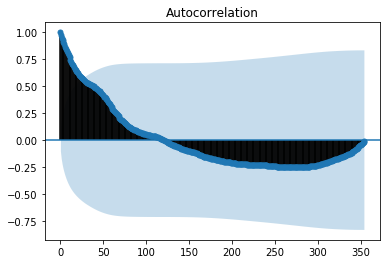

In [106]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

price = newbitcoin.iloc[:,-1].values
date = newbitcoin.iloc[:,0].values
plot_acf(price, ax=pyplot.gca())
pyplot.show()

C:\Users\Siddarth\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


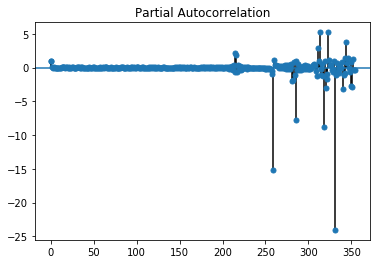

In [107]:
plot_pacf(price, ax=pyplot.gca())
pyplot.show()

## 14

In [108]:
from statsmodels.tsa.arima_model import ARIMA
xarima = ARIMA(price,order=(1,0,0)).fit()

In [109]:
#from statsmodels.tsa.arima_model import ARMAResults

x= xarima.forecast(steps=30)[0]
x



array([4920.08077086, 4918.31272071, 4916.54594662, 4914.78044768,
       4913.01622295, 4911.25327153, 4909.49159249, 4907.73118492,
       4905.97204789, 4904.21418049, 4902.45758181, 4900.70225092,
       4898.94818692, 4897.19538889, 4895.44385591, 4893.69358708,
       4891.94458147, 4890.19683818, 4888.4503563 , 4886.70513492,
       4884.96117312, 4883.21847   , 4881.47702465, 4879.73683617,
       4877.99790363, 4876.26022615, 4874.5238028 , 4872.7886327 ,
       4871.05471492, 4869.32204858])